# K Nearest Neighbors
So far, we have covered regression and probabilty estimation. Nevertheless, in some cases we may need to make classification. While using a logistic regression with multiple output may be beneficial for such case, there are basic supervised and unsupervised methods for the classification and clustering purposes. <br>
K nearest neigbors method is common because of simplicity and efficiency when previosly known data is possessed, and inferences must be made for the new-coming data. Algorithm is simple:
1. We place previously labeled sample data in an n-dimensional space.
2. We gather our unlabeled data and place it in the same space.
3. Obverse the nearest N data points, and count which class is superrior.
4. It is much likely for the new datapoint to belong to the dominant class in observed N datapoints.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, neighbors, cluster
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import pandas as pd

We import data from : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

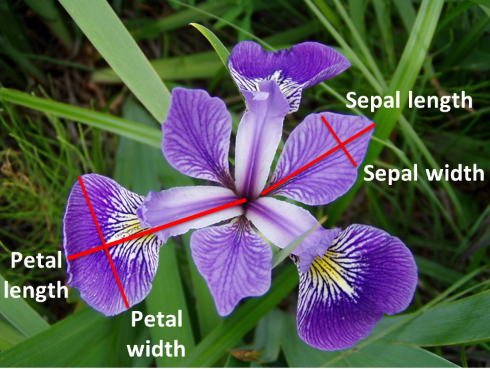
Image source:https://www.kaggle.com/vinayshaw/iris-species-100-accuracy-using-naive-bayes

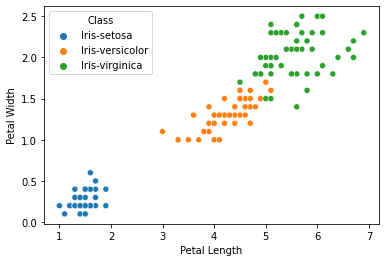

In [2]:
IrisData = pd.read_csv('iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
sns.scatterplot('Petal Length', 'Petal Width', data=IrisData, hue='Class')
plt.show()


It can be observed that, even only petal dimensions give a lot of information about the class of a flower. It is appropriate to use KNN clasification for this problem.

In [3]:
x = IrisData.iloc[:,:-1].values
y = IrisData.iloc[:, -1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

print("Test Accuracy: ", classifier.score(x_test,y_test))

Test Accuracy:  1.0


## <font color=red>**Exercise**</font>
We have gathered 5 unknown samples below. Predict which sample belongs to which category. <br>
*Hint: You can use classifier.predict(x) method.* <br>
**Extra:** Indicate the probability of prediction.


| Sepal Length | Sepal Width | Petal Length | Petal Width | Class | 
| :-: | :-: | :-: | :-: | :-: |
| 4.5 | 3.0 | 1.5 | 0.5 | Unknown |
| 7.0 | 3.0 | 5.0 | 1.5 | Unknown |
| 6.0 | 2.5 | 5.0 | 2.0 | Unknown |
| 7.0 | 3.0 | 4.5 | 1.0 | Unknown |
| 6.0 | 2.0 | 5.0 | 1.5 | Unknown |

# K-Means Clustering
While we are analyzing data, sometimes, we try to extract information from real data. For example, we can try to categorize customer behaviour with respect to different variables such as age, income, shopping date/time, etc. Or we can try to categorize countries with respect to their GDP, population, import/export rates, etc. Simply when we try to extract information which we did not encoded to data, we used unsupervised methods, and of one those methods which is used for categorization of given subjects is k-means clustering. <br>
Algorithm works in an iterative manner.
1. We define how many classes we want to extract from sample data.
2. N random points are put in an n-dimensional space. Call them **center points**.
3. For each data point, we calculate the closest center point and label it with corresponding center point.
4. After every data point is matched, we calculate a new center point from data points in the came cluster, as we are calculating center of mass of an object.
5. We repeat steps 3 and 4 until there are no changes.

We use dataset from https://www.kaggle.com/kandij/mall-customers

In [5]:
MallData = pd.read_csv('Mall_Customers.csv')
MallData.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's assume, as a marketing manager, we may want to categorize our customers by their age and spending scores. So that, we may set our marketing strategies targeting certain groups.

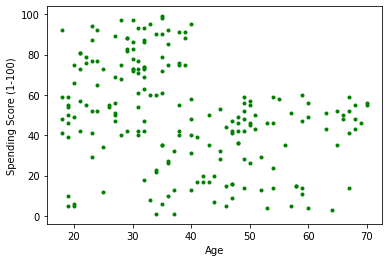

In [6]:
plt.plot(MallData['Age'], MallData['Spending Score (1-100)'], 'g.')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

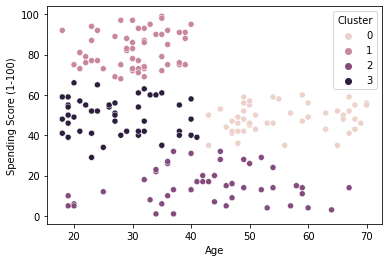

In [7]:
clustering=cluster.KMeans(n_clusters=4)
clusters = clustering.fit_predict(MallData[['Age','Spending Score (1-100)']])
MallData['Cluster'] = clusters
sns.scatterplot('Age', 'Spending Score (1-100)', data=MallData, hue='Cluster')
plt.show()

From graph above, we can comment that we have a high spending young customers below 40, following with average spending seniors and youngs, and as the last group low spending people. Using these classifications, we may design targeted advertisements and promotions for those customers.

## <font color=red>**Exercise**</font>
Use annual income to classify the customers. Explain how to choose cluster number.<br>
*Hint: What is elbow method?* <br>
**Extra:** Instead of using 2 variables and a 2D plot to cluster the data, use 3 variables and a 3D plot.

## Feedback
If there are any part which is not clear to you, you can write down your questions here.